# Price Modeling

The intent of this notebook is to investigate various models for predicting price.

In [1]:
import sys
sys.path.append('..')

In [2]:
from data_aquisition import twitter_data
from feature_engineering import features
import datetime as dt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import emojis
import pickle

In [3]:
pd.options.display.max_rows = 10000
pd.set_option('display.max_colwidth', 150)
pd.options.display.max_columns = 10000

In [4]:
# Import twitter data
tweet_data = twitter_data.read_all_twitter_data(folder='../data_aquisition/twitter_raw_data/clean_data/')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pas

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pas

In [5]:
# Clean twitter data
tweet_data = features.clean_twitter_text(tweet_data)

In [6]:
tweet_data.head()

contributors coordinates  \
2021-03-29 20:40:52+00:00         None        None   
2021-03-29 20:36:07+00:00         None        None   
2021-03-29 20:35:46+00:00         None        None   
2021-03-29 20:28:06+00:00         None        None   
2021-03-29 19:12:03+00:00         None        None   

                                               created_at entities.hashtags  \
2021-03-29 20:40:52+00:00  Mon Mar 29 20:40:52 +0000 2021                []   
2021-03-29 20:36:07+00:00  Mon Mar 29 20:36:07 +0000 2021                []   
2021-03-29 20:35:46+00:00  Mon Mar 29 20:35:46 +0000 2021                []   
2021-03-29 20:28:06+00:00  Mon Mar 29 20:28:06 +0000 2021                []   
2021-03-29 19:12:03+00:00  Mon Mar 29 19:12:03 +0000 2021                []   

                                                                                                                                                                  entities.media  \
2021-03-29 20:40:52+00:00  [{'id': 1376635485611696128, 'id_str': '1376635485611696128', 'indices': [6, 29], 'media_url': 'http://pbs.twimg.com/tweet_video_thumb/ExrKrjEVIAA...   
2021-03-29 20:36:07+00:00  [{'id': 1376634294978936841, 'id_str': '1376634294978936841', 'indices': [17, 40], 'media_url': 'http://pbs.twimg.com/media/ExrJmPnXAAk7EC4.jpg', ...   
2021-03-29 20:35:46+00:00                                                                                                                                                    NaN   
2021-03-29 20:28:06+00:00  [{'id': 1376632274087768071, 'id_str': '1376632274087768071', 'indices': [11, 34], 'media_url': 'http://pbs.twimg.com/media/ExrHwnNW8AcZxng.png', ...   
2021-03-29 19:12:03+00:00                                                                                                                                                    NaN   

                                                entities.symbols  \
2021-03-29 20:40:52+00:00  [{'text': 'AXTG', 'indices': [0, 5]}]   
2021-03-29 20:36:07+00:00  [{'text': 'AXTG', 'indices': [0, 5]}]   
2021-03-29 20:35:46+00:00  [{'text': 'AXTG', 'indices': [0, 5]}]   
2021-03-29 20:28:06+00:00  [{'text': 'AXTG', 'indices': [0, 5]}]   
2021-03-29 19:12:03+00:00  [{'text': 'AXTG', 'indices': [0, 5]}]   

                                                                                                                                                                   entities.urls  \
2021-03-29 20:40:52+00:00                                                                                                                                                     []   
2021-03-29 20:36:07+00:00                                                                                                                                                     []   
2021-03-29 20:35:46+00:00                                                                                                                                                     []   
2021-03-29 20:28:06+00:00                                                                                                                                                     []   
2021-03-29 19:12:03+00:00  [{'url': 'https://t.co/CZrAcVUgKw', 'expanded_url': 'https://twitter.com/i/web/status/1376613138947182593', 'display_url': 'twitter.com/i/web/stat...   

                          entities.user_mentions  \
2021-03-29 20:40:52+00:00                     []   
2021-03-29 20:36:07+00:00                     []   
2021-03-29 20:35:46+00:00                     []   
2021-03-29 20:28:06+00:00                     []   
2021-03-29 19:12:03+00:00                     []   

                                                                                                                                                         extended_entities.media  \
2021-03-29 20:40:52+00:00  [{'id': 1376635485611696128, 'id_str': '1376635485611696128', 'indices': [6, 29], 'media_url': 'http://pbs.twimg.com/tweet_video_thumb/

In [7]:
tweet_data = tweet_data.reset_index()

In [8]:
tweet_data.head()

index contributors coordinates  \
0 2021-03-29 20:40:52+00:00         None        None   
1 2021-03-29 20:36:07+00:00         None        None   
2 2021-03-29 20:35:46+00:00         None        None   
3 2021-03-29 20:28:06+00:00         None        None   
4 2021-03-29 19:12:03+00:00         None        None   

                       created_at entities.hashtags  \
0  Mon Mar 29 20:40:52 +0000 2021                []   
1  Mon Mar 29 20:36:07 +0000 2021                []   
2  Mon Mar 29 20:35:46 +0000 2021                []   
3  Mon Mar 29 20:28:06 +0000 2021                []   
4  Mon Mar 29 19:12:03 +0000 2021                []   

                                                                                                                                          entities.media  \
0  [{'id': 1376635485611696128, 'id_str': '1376635485611696128', 'indices': [6, 29], 'media_url': 'http://pbs.twimg.com/tweet_video_thumb/ExrKrjEVIAA...   
1  [{'id': 1376634294978936841, 'id_str': '1376634294978936841', 'indices': [17, 40], 'media_url': 'http://pbs.twimg.com/media/ExrJmPnXAAk7EC4.jpg', ...   
2                                                                                                                                                    NaN   
3  [{'id': 1376632274087768071, 'id_str': '1376632274087768071', 'indices': [11, 34], 'media_url': 'http://pbs.twimg.com/media/ExrHwnNW8AcZxng.png', ...   
4                                                                                                                                                    NaN   

                        entities.symbols  \
0  [{'text': 'AXTG', 'indices': [0, 5]}]   
1  [{'text': 'AXTG', 'indices': [0, 5]}]   
2  [{'text': 'AXTG', 'indices': [0, 5]}]   
3  [{'text': 'AXTG', 'indices': [0, 5]}]   
4  [{'text': 'AXTG', 'indices': [0, 5]}]   

                                                                                                                                           entities.urls  \
0                                                                                                                                                     []   
1                                                                                                                                                     []   
2                                                                                                                                                     []   
3                                                                                                                                                     []   
4  [{'url': 'https://t.co/CZrAcVUgKw', 'expanded_url': 'https://twitter.com/i/web/status/1376613138947182593', 'display_url': 'twitter.com/i/web/stat...   

  entities.user_mentions  \
0                     []   
1                     []   
2                     []   
3                     []   
4                     []   

                                                                                                                                 extended_entities.media  \
0  [{'id': 1376635485611696128, 'id_str': '1376635485611696128', 'indices': [6, 29], 'media_url': 'http://pbs.twimg.com/tweet_video_thumb/ExrKrjEVIAA...   
1  [{'id': 1376634294978936841, 'id_str': '1376634294978936841', 'indices': [17, 40], 'media_url': 'http://pbs.twimg.com/media/ExrJmPnXAAk7EC4.jpg', ...   
2                                                                                                                                                    NaN   
3  [{'id': 1376632274087768071, 'id_str': '1376632274087768071', 'indices': [11, 34], 'media_url': 'http://pbs.twimg.com/media/ExrHwnNW8AcZxng.png', ...   
4                                                                                                                                                    NaN   

   favorite_count  favorited   geo                   id               id_str  \
0               2      False 

In [9]:
# Add features
tweet_data = features.create_tweet_features(tweet_data, run_tfidf=True)

Count vector shape of vectorized data: (100438, 50)


In [10]:
tweet_data.shape

(100438, 397)

In [11]:
tweet_data.head()

index contributors coordinates  \
0 2021-03-29 20:40:52+00:00         None        None   
1 2021-03-29 20:36:07+00:00         None        None   
2 2021-03-29 20:35:46+00:00         None        None   
3 2021-03-29 20:28:06+00:00         None        None   
4 2021-03-29 19:12:03+00:00         None        None   

                       created_at entities.hashtags  \
0  Mon Mar 29 20:40:52 +0000 2021                []   
1  Mon Mar 29 20:36:07 +0000 2021                []   
2  Mon Mar 29 20:35:46 +0000 2021                []   
3  Mon Mar 29 20:28:06 +0000 2021                []   
4  Mon Mar 29 19:12:03 +0000 2021                []   

                                                                                                                                          entities.media  \
0  [{'id': 1376635485611696128, 'id_str': '1376635485611696128', 'indices': [6, 29], 'media_url': 'http://pbs.twimg.com/tweet_video_thumb/ExrKrjEVIAA...   
1  [{'id': 1376634294978936841, 'id_str': '1376634294978936841', 'indices': [17, 40], 'media_url': 'http://pbs.twimg.com/media/ExrJmPnXAAk7EC4.jpg', ...   
2                                                                                                                                                    NaN   
3  [{'id': 1376632274087768071, 'id_str': '1376632274087768071', 'indices': [11, 34], 'media_url': 'http://pbs.twimg.com/media/ExrHwnNW8AcZxng.png', ...   
4                                                                                                                                                    NaN   

                        entities.symbols  \
0  [{'text': 'AXTG', 'indices': [0, 5]}]   
1  [{'text': 'AXTG', 'indices': [0, 5]}]   
2  [{'text': 'AXTG', 'indices': [0, 5]}]   
3  [{'text': 'AXTG', 'indices': [0, 5]}]   
4  [{'text': 'AXTG', 'indices': [0, 5]}]   

                                                                                                                                           entities.urls  \
0                                                                                                                                                     []   
1                                                                                                                                                     []   
2                                                                                                                                                     []   
3                                                                                                                                                     []   
4  [{'url': 'https://t.co/CZrAcVUgKw', 'expanded_url': 'https://twitter.com/i/web/status/1376613138947182593', 'display_url': 'twitter.com/i/web/stat...   

  entities.user_mentions  \
0                     []   
1                     []   
2                     []   
3                     []   
4                     []   

                                                                                                                                 extended_entities.media  \
0  [{'id': 1376635485611696128, 'id_str': '1376635485611696128', 'indices': [6, 29], 'media_url': 'http://pbs.twimg.com/tweet_video_thumb/ExrKrjEVIAA...   
1  [{'id': 1376634294978936841, 'id_str': '1376634294978936841', 'indices': [17, 40], 'media_url': 'http://pbs.twimg.com/media/ExrJmPnXAAk7EC4.jpg', ...   
2                                                                                                                                                    NaN   
3  [{'id': 1376632274087768071, 'id_str': '1376632274087768071', 'indices': [11, 34], 'media_url': 'http://pbs.twimg.com/media/ExrHwnNW8AcZxng.png', ...   
4                                                                                                                                                    NaN   

   favorite_count  favorited   geo                   id               id_str  \
0               2      False 

In [12]:
# Import sentiment models
with open('log_sent_classifier.pkl', 'rb') as model:
    log_clf = pickle.load(model)

In [13]:
with open('RF_sent_classifier.pkl', 'rb') as model:
    rf_clf = pickle.load(model)

In [14]:
# Add sentiment column
tweet_data['Sentiment'] = log_clf.predict(tweet_data.loc[:, 'news':])

In [15]:
tweet_data[['created_at','text_dec', 'Sentiment', 'stock']]

created_at  \
0       Mon Mar 29 20:40:52 +0000 2021   
1       Mon Mar 29 20:36:07 +0000 2021   
2       Mon Mar 29 20:35:46 +0000 2021   
3       Mon Mar 29 20:28:06 +0000 2021   
4       Mon Mar 29 19:12:03 +0000 2021   
...                                ...   
100433  Sat Apr 03 07:44:14 +0000 2021   
100434  Sat Apr 03 01:46:45 +0000 2021   
100435  Sat Apr 03 01:44:48 +0000 2021   
100436  Sat Apr 03 01:39:59 +0000 2021   
100437  Sat Apr 03 01:39:45 +0000 2021   

                                                                                                                        text_dec  \
0                                                                                                                                  
1                                                                                                                    reinstated    
2                                                                                                                    class setup   
3                                                                                                             re :monocle_face:    
4                 we know filings are coming to this gem as the new intern ceo listed friday is an accountant on a few other co    
...                                                                                                                          ...   
100433  rt  extremely intrigued with  as a short term swing merger announcement with royal app is multiple times the size of the   
100434           rt   posting a few links on the royal app ltd service  acquired by metro one telecommunications for  their lead   
100435            extremely intrigued with  as a short term swing merger announcement with royal app is multiple times the size    
100436             rt   the merger is legit looked up the sos filings and bang with only 6mil os this one is bound to skyrocket    
100437  rt  and also took a lot of  very low market cap as well and they announced merger that is 3 times bigger than their mark   

        Sentiment stock  
0             0.0  AXTG  
1             0.0  AXTG  
2             0.0  AXTG  
3             0.0  AXTG  
4             0.0  AXTG  
...           ...   ...  
100433        0.0  WOWI  
100434        0.0  WOWI  
100435        0.0  WOWI  
100436        0.0  WOWI  
100437        0.0  WOWI  

[100438 rows x 4 columns]

In [16]:
tweet_data.groupby(['stock', 'Sentiment']).count()

index  contributors  coordinates  created_at  \
stock Sentiment                                                 
AXTG  -1.0           3             0            0           3   
       0.0          82             0            0          82   
       1.0           8             0            0           8   
CAN   -1.0          95             0            0          95   
       0.0        1205             0            0        1205   
       1.0         137             0            0         137   
CERPQ -1.0          58             0            0          58   
       0.0         521             0            0         521   
       1.0          59             0            0          59   
D     -1.0          28             0            0           0   
       0.0         483             0            0           0   
       1.0          16             0            0           0   
DLPN  -1.0         846             0            0           0   
       0.0        7924             0            0           0   
       1.0         831             0            0           0   
DPLN  -1.0          10             0            0          10   
       0.0         109             0            0         109   
       1.0           8             0            0           8   
EEENF -1.0        6026             0            0        6026   
       0.0       44481             0            0       44481   
       1.0        6434             0            0        6434   
GYST  -1.0         101             0            0         101   
       0.0        1413             0            0        1413   
       1.0         174             0            0         174   
IBRC  -1.0           8             0            0           8   
       0.0         916             0            0         916   
       1.0          30             0            0          30   
L     -1.0           4             0            0           0   
       0.0         218             0            0           0   
       1.0           1             0            0           0   
MARA  -1.0         343             0            0         343   
       0.0        2873             0            0        2873   
       1.0         227             0            0         227   
N     -1.0           6             0            0           0   
       0.0         176             0            0           0   
       1.0           2             0            0           0   
P      0.0         156             0            0           0   
       1.0           1             0            0           0   
SEAC  -1.0         290             0            0         290   
       0.0        2032             0            0        2032   
       1.0         150             0            0         150   
SOL   -1.0        1202             0            0        1202   
       0.0       13224             0            0       13224   
       1.0        2203             0            0        2203   
TTCM  -1.0         223             0            0         223   
       0.0        4126             0            0        4126   
       1.0         405             0            0         405   
WNRS  -1.0          63             0            0          63   
       0.0         408             0            0         408   
       1.0          17             0            0          17   
WOWI  -1.0           2             0            0           2   
       0.0          78             0            0          78   
       1.0           2             0            0           2   

                 entities.hashtags  entities.media  entities.symbols  \
stock Sentiment                                                        
AXTG  -1.0                       3               0                 3   
       0.0                      82              12                82   
       1.0                       8               0                 8   
CAN   -1.0                      95               2                95   
       0.

In [17]:
import yfinance as yf

In [18]:
current_stocks = list(tweet_data['stock'].unique())
print(current_stocks)
# Filter out the bad ones for now
current_stocks = ['AXTG', 'EEENF', 'GYST']

['AXTG', 'CAN', 'CERPQ', 'D', 'L', 'P', 'N', 'DLPN', 'DPLN', 'EEENF', 'GYST', 'IBRC', 'MARA', 'SEAC', 'SOL', 'TTCM', 'WNRS', 'WOWI']


In [19]:
def get_stock_data(tickers, start, end, interval="1m"):
    stock_data = pd.DataFrame()
    for ticker in tickers:
        data = yf.download(tickers=ticker, start=start, end=end, interval=interval , group_by='ticker', auto_adjust=True, prepost=True, threads=True, proxy=None)
        data['stock'] = ticker
        data['Datetime_eastern'] = data.index.tz_convert('US/Eastern')
        stock_data = stock_data.append(data)
        
    return stock_data.reset_index()

In [82]:
price_data = get_stock_data(current_stocks, "2021-03-23", "2021-04-5", interval='5m')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [83]:
price_data.head()

Datetime    Open    High     Low   Close  Volume stock  \
0 2021-03-23 14:30:00-04:00  0.0035  0.0035  0.0035  0.0035    2500  AXTG   
1 2021-03-25 11:50:00-04:00  0.0035  0.0035  0.0035  0.0035       0  AXTG   
2 2021-03-25 13:00:00-04:00  0.0037  0.0039  0.0037  0.0039   15000  AXTG   
3 2021-03-25 13:05:00-04:00  0.0037  0.0100  0.0037  0.0100  310420  AXTG   
4 2021-03-25 13:10:00-04:00  0.0180  0.0210  0.0120  0.0210   90000  AXTG   

           Datetime_eastern  
0 2021-03-23 14:30:00-04:00  
1 2021-03-25 11:50:00-04:00  
2 2021-03-25 13:00:00-04:00  
3 2021-03-25 13:05:00-04:00  
4 2021-03-25 13:10:00-04:00

In [84]:
def merge_price_and_tweets(stocks, price_df, tweets_df):
    # Merging on eastern standard time
    # Need to sort data before merge
    tweets_df.sort_values(by=['stock', 'Datetime_eastern'], inplace=True)
    price_df.sort_values(by=['stock', 'Datetime_eastern'], inplace=True)
    labeled_data_price = pd.DataFrame()
    for stock in stocks:
        labeled_data_sub = tweets_df[tweets_df['stock'] == stock]
        price_data_sub = price_df[price_df['stock'] == stock].drop('stock', axis=1)
        merged_df = pd.merge_asof(labeled_data_sub, price_data_sub, on='Datetime_eastern', direction="nearest")
#         merged_df = merged_df.append(labeled_data_sub)
#         merged_df = merged_df.sort_values('Open').drop_duplicates(subset='id_str', keep='first')
        labeled_data_price = labeled_data_price.append(merged_df)
    return labeled_data_price

In [85]:
all_data = merge_price_and_tweets(current_stocks, price_data, tweet_data)

In [86]:
all_data.groupby(['stock', 'Sentiment']).count()

index  contributors  coordinates  created_at  \
stock Sentiment                                                 
AXTG  -1.0           3             0            0           3   
       0.0          82             0            0          82   
       1.0           8             0            0           8   
EEENF -1.0        6026             0            0        6026   
       0.0       44481             0            0       44481   
       1.0        6434             0            0        6434   
GYST  -1.0         101             0            0         101   
       0.0        1413             0            0        1413   
       1.0         174             0            0         174   

                 entities.hashtags  entities.media  entities.symbols  \
stock Sentiment                                                        
AXTG  -1.0                       3               0                 3   
       0.0                      82              12                82   
       1.0                       8               0                 8   
EEENF -1.0                    6026             690              6026   
       0.0                   44481            8724             44481   
       1.0                    6434            1443              6434   
GYST  -1.0                     101               4               101   
       0.0                    1413             149              1413   
       1.0                     174               5               174   

                 entities.urls  entities.user_mentions  \
stock Sentiment                                          
AXTG  -1.0                   3                       3   
       0.0                  82                      82   
       1.0                   8                       8   
EEENF -1.0                6026                    6026   
       0.0               44481                   44481   
       1.0                6434                    6434   
GYST  -1.0                 101                     101   
       0.0                1413                    1413   
       1.0                 174                     174   

                 extended_entities.media  favorite_count  favorited  geo  \
stock Sentiment                                                            
AXTG  -1.0                             0               3          3    0   
       0.0                            12              82         82    0   
       1.0                             0               8          8    0   
EEENF -1.0                           690            6026       6026    0   
       0.0                          8724           44481      44481    0   
       1.0                          1443            6434       6434    0   
GYST  -1.0                             4             101        101    0   
       0.0                           149            1413       1413    0   
       1.0                             5             174        174    0   

                    id  id_str  in_reply_to_screen_name  \
stock Sentiment                                           
AXTG  -1.0           3       3                        0   
       0.0          82      82                        5   
       1.0           8       8                        0   
EEENF -1.0        6026    6026                      548   
       0.0       44481   44481                     4251   
       1.0        6434    6434                      310   
GYST  -1.0         101     101                       11   
       0.0        1413    1413                       53   
       1.0         174     174                        1   

                 in_reply_to_status_id  in_reply_to_status_id_str  \
stock Sentiment                                                     
AXTG  -1.0                           0                          0   
       0.0                           5                          5   
       1.0                           0                          0   
EEENF -1.0                         52

In [87]:
color_dict = dict({-1:'red',
                  0:'orange',
                  1: 'green'})

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:643: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)


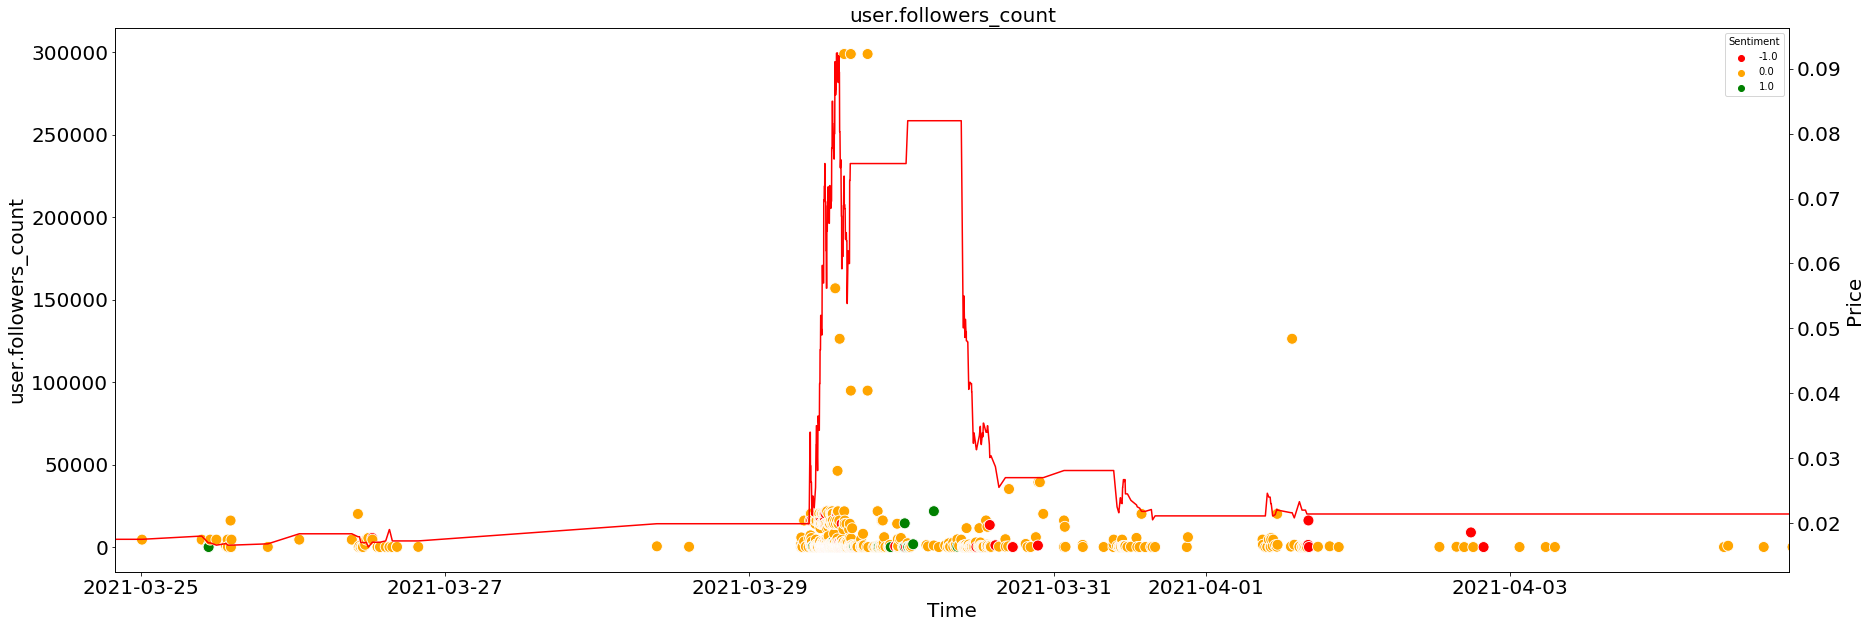

In [88]:
df = all_data[all_data['stock'] == 'GYST']
start = '2021-03-25'
end = '2021-04-5'
col = 'user.followers_count'
fig, ax1 = plt.subplots(figsize=(30,10))
ax1 = sns.scatterplot(data=df, x=df['Datetime_eastern'], y=col, s=120, hue='Sentiment', palette=color_dict)
ax1.set_xlim(start, end)
ax1.set_title(col,fontsize=20)
ax1.set_xlabel("Time",fontsize=20)
ax1.set_ylabel(col,fontsize=20)
ax1.tick_params(labelsize=20)
ax2 = ax1.twinx()
ax2 = sns.lineplot(data=df, x=df['Datetime_eastern'], y="Open", color='red')
ax2.set_ylabel("Price",fontsize=20)
ax2.tick_params(labelsize=20)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:643: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)


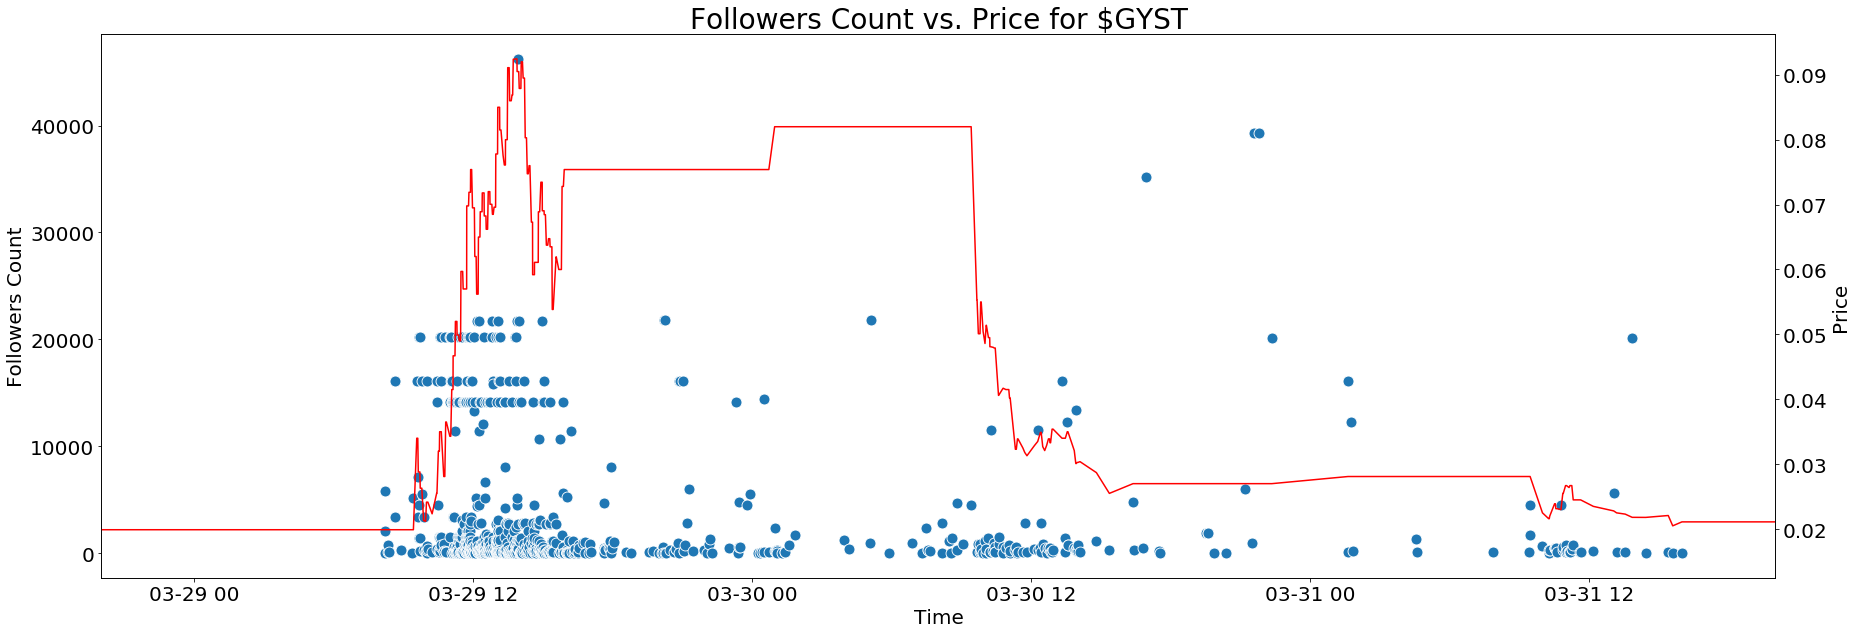

In [123]:
# For report
df = all_data[(all_data['stock'] == 'GYST') & (all_data['user.followers_count'] < 50000)]
start = '2021-03-29'
end = '2021-04-1'
col = 'user.followers_count'
fig, ax1 = plt.subplots(figsize=(30,10))
ax1 = sns.scatterplot(data=df, x=df['Datetime_eastern'], y=col, s=120)
ax1.set_xlim(start, end)
ax1.set_title("Followers Count vs. Price for $GYST",fontsize=28)
ax1.set_xlabel("Time",fontsize=20)
ax1.set_ylabel("Followers Count",fontsize=20)
ax1.tick_params(labelsize=20)
ax2 = ax1.twinx()
ax2 = sns.lineplot(data=df, x=df['Datetime_eastern'], y="Open", color='red')
ax2.set_ylabel("Price",fontsize=20)
ax2.tick_params(labelsize=20)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\relational.py:643: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)


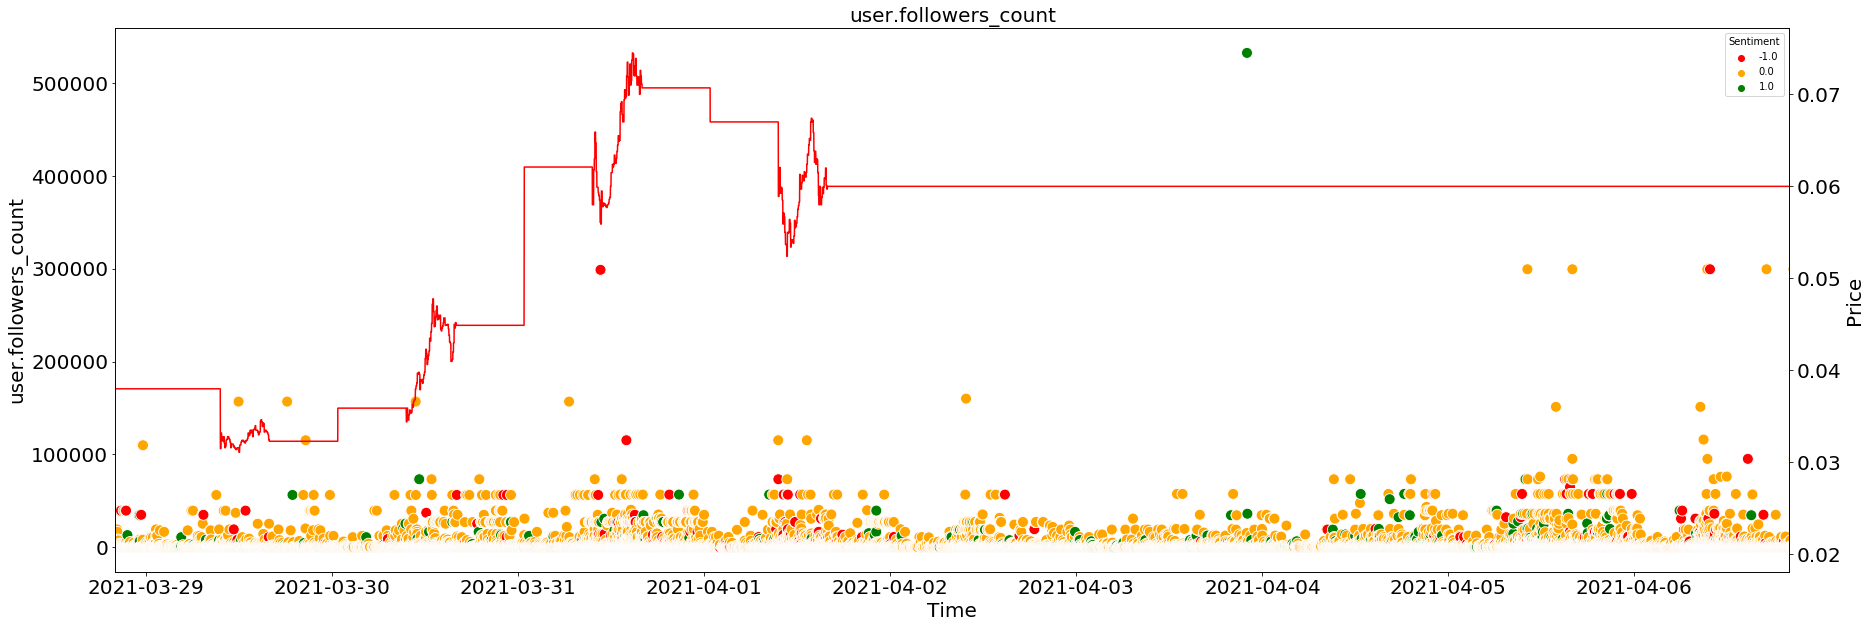

In [89]:
df = all_data[all_data['stock'] == 'EEENF']
start = '2021-03-29'
end = '2021-04-7'
col = 'user.followers_count'
fig, ax1 = plt.subplots(figsize=(30,10))
ax1 = sns.scatterplot(data=df, x=df['Datetime_eastern'], y=col, s=120, hue='Sentiment', palette=color_dict)
ax1.set_xlim(start, end)
ax1.set_title(col,fontsize=20)
ax1.set_xlabel("Time",fontsize=20)
ax1.set_ylabel(col,fontsize=20)
ax1.tick_params(labelsize=20)
ax2 = ax1.twinx()
ax2 = sns.lineplot(data=df, x=df['Datetime_eastern'], y="Open", color='red')
ax2.set_ylabel("Price",fontsize=20)
ax2.tick_params(labelsize=20)

In [147]:
# Create column for future price
all_data['future_price'] = all_data['Open'].shift(-6)
all_data = all_data.fillna(method='ffill')

In [148]:
all_data.isna().any()

index                                                                     False
contributors                                                               True
coordinates                                                                True
created_at                                                                False
entities.hashtags                                                         False
entities.media                                                            False
entities.symbols                                                          False
entities.urls                                                             False
entities.user_mentions                                                    False
extended_entities.media                                                   False
favorite_count                                                            False
favorited                                                                 False
geo                                     

In [149]:
all_data.head()

index contributors coordinates  \
0 2021-03-25 17:50:13+00:00         None        None   
1 2021-03-25 17:50:48+00:00         None        None   
2 2021-03-25 18:47:48+00:00         None        None   
3 2021-03-25 20:02:03+00:00         None        None   
4 2021-03-25 20:02:48+00:00         None        None   

                       created_at  \
0  Thu Mar 25 17:50:13 +0000 2021   
1  Thu Mar 25 17:50:48 +0000 2021   
2  Thu Mar 25 18:47:48 +0000 2021   
3  Thu Mar 25 20:02:03 +0000 2021   
4  Thu Mar 25 20:02:48 +0000 2021   

                                                                                                                          entities.hashtags  \
0                                                                                                       [{'text': 'RT', 'indices': [0, 3]}]   
1                                                                                                     [{'text': 'RT', 'indices': [13, 16]}]   
2                                                                                                                                        []   
3                                                                                           [{'text': 'pennystocks', 'indices': [93, 105]}]   
4  [{'text': 'pennystocks', 'indices': [107, 119]}, {'text': 'hotstocks', 'indices': [120, 130]}, {'text': 'otcbb', 'indices': [131, 137]}]   

                                                                                                                                          entities.media  \
0  [{'id': 1375133979192426497, 'id_str': '1375133979192426497', 'indices': [78, 101], 'media_url': 'http://pbs.twimg.com/media/ExV1EXxVgAE9MyN.png',...   
1  [{'id': 1375133979192426497, 'id_str': '1375133979192426497', 'indices': [91, 114], 'media_url': 'http://pbs.twimg.com/media/ExV1EXxVgAE9MyN.png',...   
2  [{'id': 1375133979192426497, 'id_str': '1375133979192426497', 'indices': [91, 114], 'media_url': 'http://pbs.twimg.com/media/ExV1EXxVgAE9MyN.png',...   
3  [{'id': 1375133979192426497, 'id_str': '1375133979192426497', 'indices': [91, 114], 'media_url': 'http://pbs.twimg.com/media/ExV1EXxVgAE9MyN.png',...   
4  [{'id': 1375133979192426497, 'id_str': '1375133979192426497', 'indices': [91, 114], 'media_url': 'http://pbs.twimg.com/media/ExV1EXxVgAE9MyN.png',...   

                                                                                                                                        entities.symbols  \
0                                                                                                                [{'text': 'AXTG', 'indices': [57, 62]}]   
1                                                                                                                [{'text': 'AXTG', 'indices': [70, 75]}]   
2                                                                                                                  [{'text': 'AXTG', 'indices': [0, 5]}]   
3  [{'text': 'LTTGF', 'indices': [33, 39]}, {'text': 'AXTG', 'indices': [40, 45]}, {'text': 'SEVA', 'indices': [46, 51]}, {'text': 'AFOM', 'indices':...   
4  [{'text': 'LTTGF', 'indices': [47, 53]}, {'text': 'AXTG', 'indices': [54, 59]}, {'text': 'SEVA', 'indices': [60, 65]}, {'text': 'AFOM', 'indices':...   

                                                                                                                                           entities.urls  \
0                                                                                                                                                     []   
1                                                                                                                                                     []   
2                                                                                                                                                     []   
3  [{'url': 'https://t.co/nBJ2yCqTZF', 'expanded_url': 'https://twitter.com/i/web/status/1375176172099747

# Predicting Price 

In [150]:
X = all_data[['Open', 'favorite_count', 'user.followers_count', 'exc_count', 'characters_nb', 'emoji_count', 'Sentiment']]
y = all_data['future_price']

In [151]:
y.isna().any()

False

In [152]:
from sklearn.linear_model import LinearRegression

In [153]:
lin_model = LinearRegression().fit(X, y)

In [154]:
lin_model.coef_

array([ 9.98055733e-01,  1.79947889e-07, -7.90405967e-10, -9.48224747e-07,
       -7.29934329e-08, -2.41733790e-06,  6.89108893e-06])

In [155]:
all_data['lin_pred_price'] = lin_model.predict(all_data[['Open', 'favorite_count', 'user.followers_count', 'exc_count', 'characters_nb', 'emoji_count', 'Sentiment']])

In [160]:
all_data.head(20)

index contributors coordinates  \
0  2021-03-25 17:50:13+00:00         None        None   
1  2021-03-25 17:50:48+00:00         None        None   
2  2021-03-25 18:47:48+00:00         None        None   
3  2021-03-25 20:02:03+00:00         None        None   
4  2021-03-25 20:02:48+00:00         None        None   
5  2021-03-25 20:28:14+00:00         None        None   
6  2021-03-26 14:32:41+00:00         None        None   
7  2021-03-26 14:33:37+00:00         None        None   
8  2021-03-26 14:36:29+00:00         None        None   
9  2021-03-26 14:36:32+00:00         None        None   
10 2021-03-26 15:59:30+00:00         None        None   
11 2021-03-26 16:42:03+00:00         None        None   
12 2021-03-26 16:45:24+00:00         None        None   
13 2021-03-26 17:01:32+00:00         None        None   
14 2021-03-26 18:24:32+00:00         None        None   
15 2021-03-26 18:46:40+00:00         None        None   
16 2021-03-29 14:28:00+00:00         None        None   
17 2021-03-29 16:36:50+00:00         None        None   
18 2021-03-29 19:12:03+00:00         None        None   
19 2021-03-29 20:28:06+00:00         None        None   

                        created_at  \
0   Thu Mar 25 17:50:13 +0000 2021   
1   Thu Mar 25 17:50:48 +0000 2021   
2   Thu Mar 25 18:47:48 +0000 2021   
3   Thu Mar 25 20:02:03 +0000 2021   
4   Thu Mar 25 20:02:48 +0000 2021   
5   Thu Mar 25 20:28:14 +0000 2021   
6   Fri Mar 26 14:32:41 +0000 2021   
7   Fri Mar 26 14:33:37 +0000 2021   
8   Fri Mar 26 14:36:29 +0000 2021   
9   Fri Mar 26 14:36:32 +0000 2021   
10  Fri Mar 26 15:59:30 +0000 2021   
11  Fri Mar 26 16:42:03 +0000 2021   
12  Fri Mar 26 16:45:24 +0000 2021   
13  Fri Mar 26 17:01:32 +0000 2021   
14  Fri Mar 26 18:24:32 +0000 2021   
15  Fri Mar 26 18:46:40 +0000 2021   
16  Mon Mar 29 14:28:00 +0000 2021   
17  Mon Mar 29 16:36:50 +0000 2021   
18  Mon Mar 29 19:12:03 +0000 2021   
19  Mon Mar 29 20:28:06 +0000 2021   

                                                                                                                           entities.hashtags  \
0                                                                                                        [{'text': 'RT', 'indices': [0, 3]}]   
1                                                                                                      [{'text': 'RT', 'indices': [13, 16]}]   
2                                                                                                                                         []   
3                                                                                            [{'text': 'pennystocks', 'indices': [93, 105]}]   
4   [{'text': 'pennystocks', 'indices': [107, 119]}, {'text': 'hotstocks', 'indices': [120, 130]}, {'text': 'otcbb', 'indices': [131, 137]}]   
5   [{'text': 'pennystocks', 'indices': [107, 119]}, {'text': 'hotstocks', 'indices': [120, 130]}, {'text': 'otcbb', 'indices': [131, 137]}]   
6                                                                                                                                         []   
7                                                                                                                                         []   
8                                                                                                                                         []   
9                                                                                                                                         []   
10                                                                                                                                        []   
11                                                                                                                                        []   
12                                                                                                                                        []   
13        

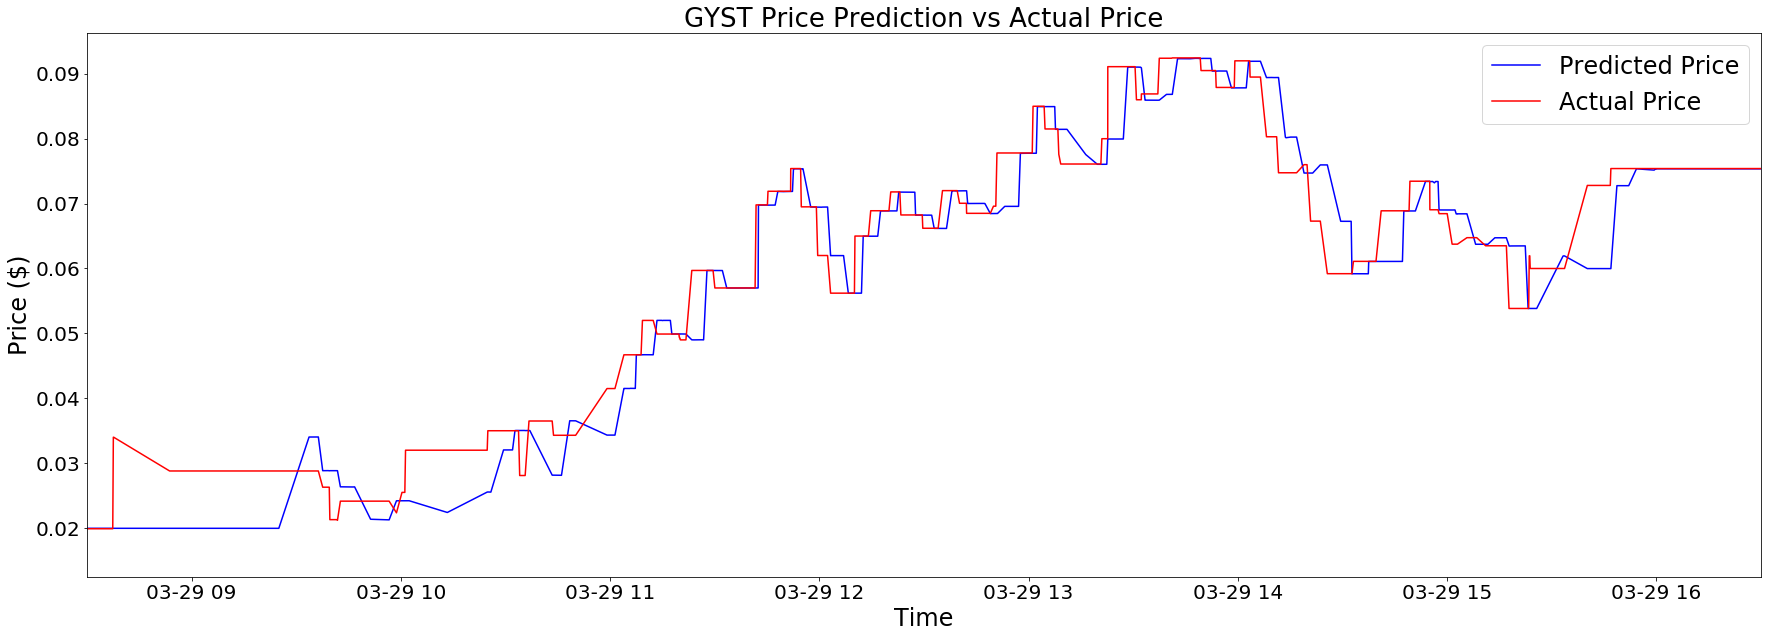

In [173]:
df = all_data[all_data['stock'] == 'GYST']
start = '2021-03-29 T12:30:00'
end = '2021-03-29 T20:30:00'
col = 'lin_pred_price'
fig, ax1 = plt.subplots(figsize=(30,10))
ax1 = sns.lineplot(data=df, x=df['Datetime_eastern'], y=col, color='blue', label='Predicted Price')
ax1.set_xlim(start, end)
ax1.set_title("GYST Price Prediction vs Actual Price",fontsize=26)
ax1.set_xlabel("Time",fontsize=24)
ax1.set_ylabel("Price ($)",fontsize=24)
ax1.tick_params(labelsize=20)
ax1 = sns.lineplot(data=df, x=df['Datetime_eastern'], y="future_price", color='red', label='Actual Price')
ax1.tick_params(labelsize=20)
plt.legend(prop={'size': 24})

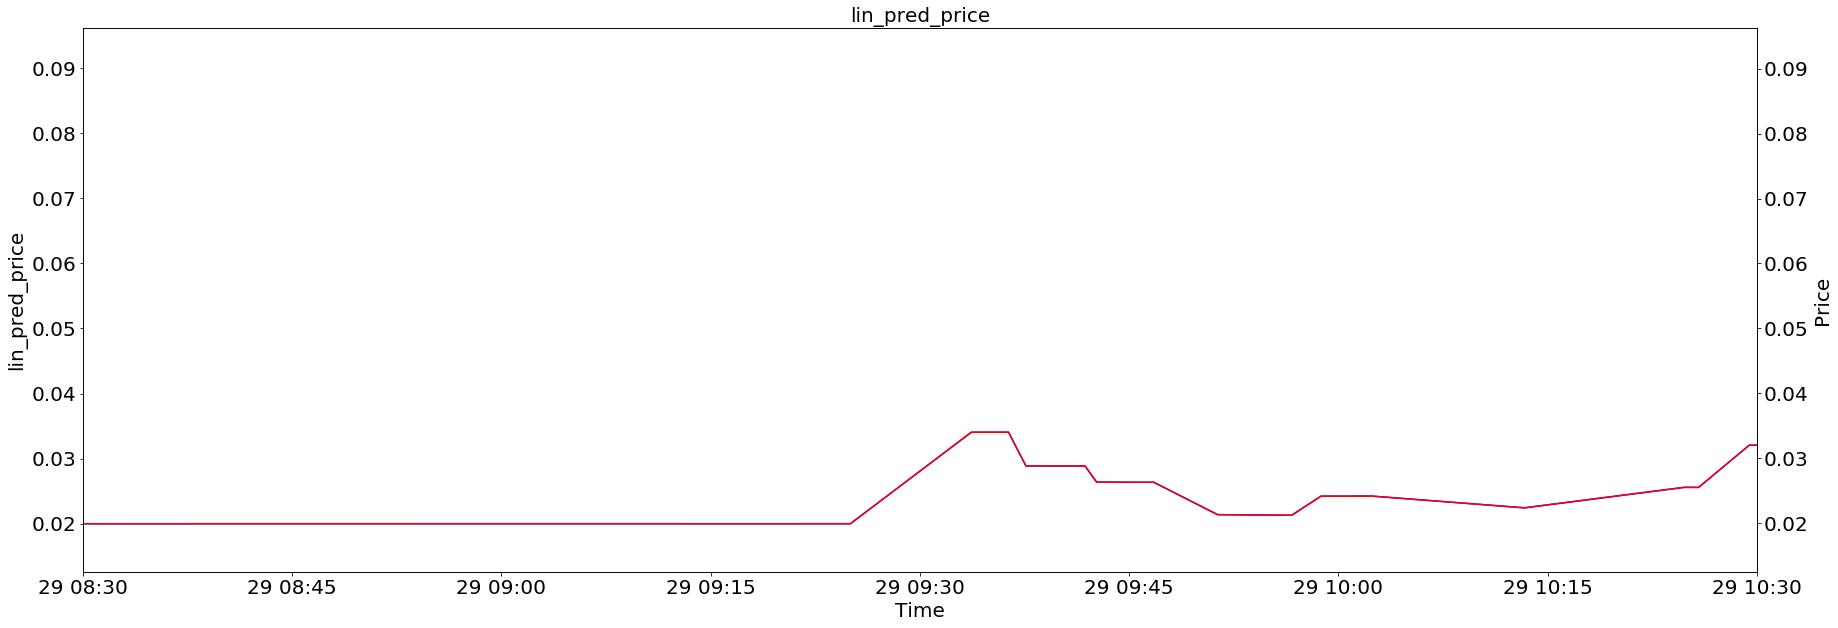

In [145]:
df = all_data[all_data['stock'] == 'GYST']
start = '2021-03-29 T12:30:00'
end = '2021-03-29 T14:30:00'
col = 'lin_pred_price'
fig, ax1 = plt.subplots(figsize=(30,10))
ax1 = sns.lineplot(data=df, x=df['Datetime_eastern'], y=col, color='blue')
ax1.set_xlim(start, end)
ax1.set_title(col,fontsize=20)
ax1.set_xlabel("Time",fontsize=20)
ax1.set_ylabel(col,fontsize=20)
ax1.tick_params(labelsize=20)
ax2 = ax1.twinx()
ax2 = sns.lineplot(data=df, x=df['Datetime_eastern'], y="Open", color='red')
ax2.set_ylabel("Price",fontsize=20)
ax2.tick_params(labelsize=20)

In [113]:
all_data['error'] = all_data['future_price'] - all_data['lin_pred_price']

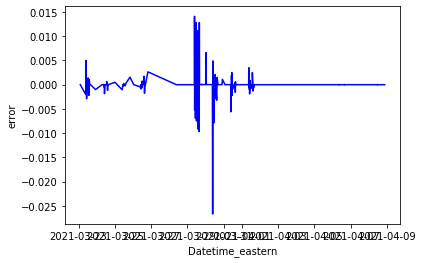

In [114]:
df = all_data[all_data['stock'] == 'GYST']
sns.lineplot(data=df, x=df['Datetime_eastern'], y='error', color='blue')

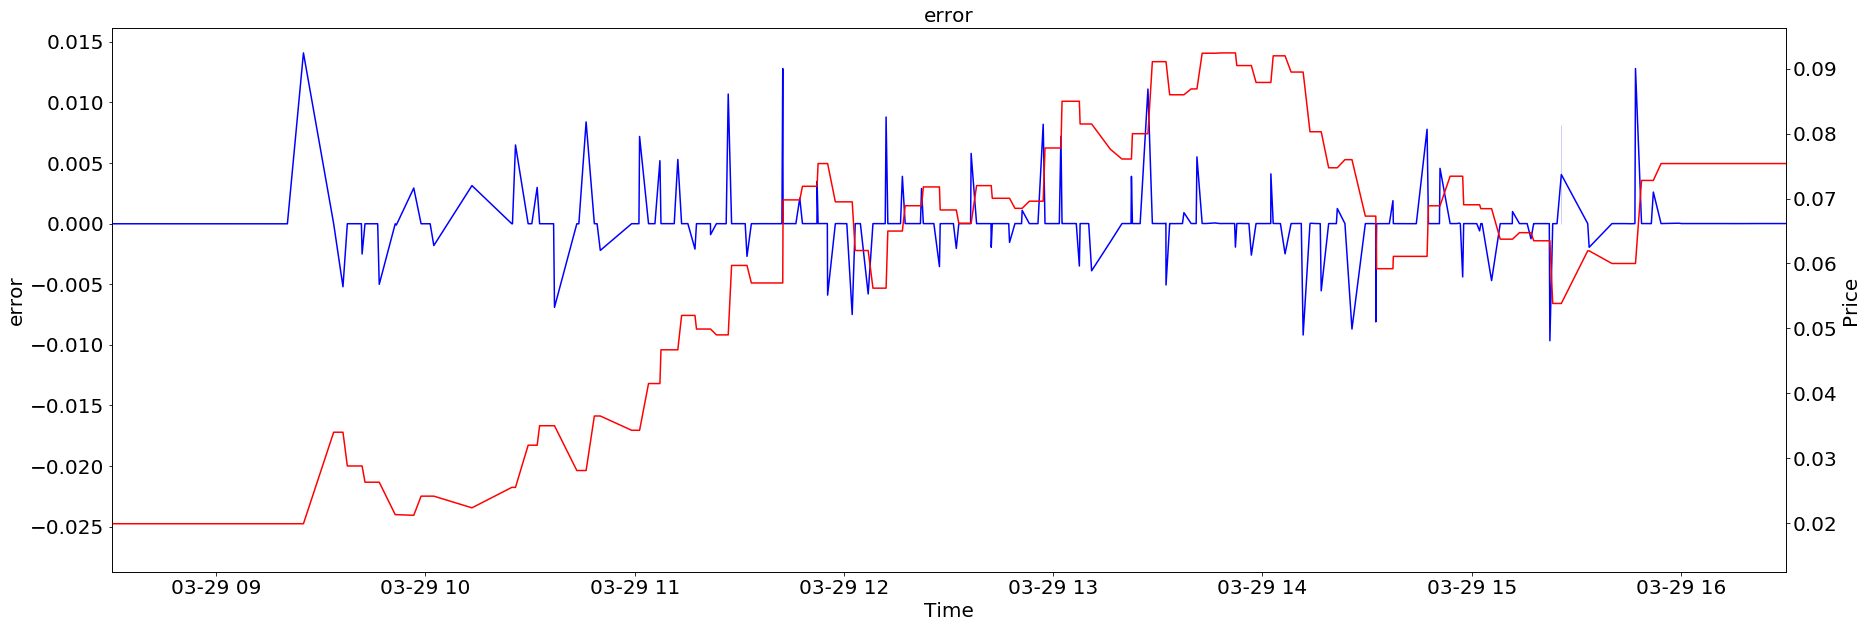

In [115]:
df = all_data[all_data['stock'] == 'GYST']
start = '2021-03-29 T12:30:00'
end = '2021-03-29 T20:30:00'
col = 'error'
fig, ax1 = plt.subplots(figsize=(30,10))
ax1 = sns.lineplot(data=df, x=df['Datetime_eastern'], y=col, color='blue')
ax1.set_xlim(start, end)
ax1.set_title(col,fontsize=20)
ax1.set_xlabel("Time",fontsize=20)
ax1.set_ylabel(col,fontsize=20)
ax1.tick_params(labelsize=20)
ax2 = ax1.twinx()
ax2 = sns.lineplot(data=df, x=df['Datetime_eastern'], y="Open", color='red')
ax2.set_ylabel("Price",fontsize=20)
ax2.tick_params(labelsize=20)